In [1]:
import requests


params = {
  'access_key': 'c8c096da5274ce7abe2074269e22266d',
    'limit' : '400'
}

api_result = requests.get('https://api.marketstack.com/v1/tickers/EXS1.XETRA/eod', params)
api_result2 = requests.get('https://api.marketstack.com/v1/tickers/SPY/eod', params)

api_response = api_result.json()
api_response2 = api_result2.json()

In [2]:
import numpy as np
import pandas as pd
len(api_response['data']['eod'])

400

In [3]:
new_list = api_response['data']['eod']
xnp = np.arange(1)
for item in new_list:
    np.stack(xnp, item['close'])

TypeError: integer argument expected, got float

In [4]:
import matplotlib.pyplot as plt

In [5]:
#eine Liste mit den gesamten Daten für die Schlusskurse
type(api_response['data']['eod'])
new_list = api_response['data']['eod']
new_list2 = api_response2['data']['eod']

In [6]:
#neue Liste mit den Schlusskursen
x = []
y = []
for item in new_list:
    x.append(item['close'])
for item in new_list2:
    y.append(item['close'])

In [7]:
# Berchnung der täglichen prozentualen Veränderung + Häufigkeit von Ereignissen zählen
x_prozent = [((x[1]/x[0])-1)*100]
indx = 0
ereignis=0
for item in x:
    x_prozent.append(((x[indx+1]/x[indx])-1)*100)
    indx +=1
    if indx == len(x)-1:
        break
    if x_prozent[indx] <= -2:
        ereignis +=1
    if x_prozent[indx] >= 2:
        ereignis += 1
        
y_prozent = [((y[1]/y[0])-1)*100]
indy = 0
ereignisy=0
for item in y:
    y_prozent.append(((y[indy+1]/y[indy])-1)*100)
    indy +=1
    if indy == len(y)-1:
        break
    if y_prozent[indy] <= -2:
        ereignisy +=1
    if y_prozent[indy] >= 2:
        ereignisy += 1

Text(0.5, 0, 'X_Label')

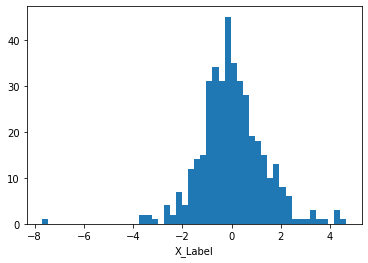

In [10]:
plt.hist(x_prozent, bins = 50)
plt.xlabel('X_Label')

In [11]:
print(ereignis/len(x_prozent))
print(ereignisy/len(y_prozent))

0.1075
0.1275


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  0.,
         6.,  7.,  3.,  5.,  8.,  9., 14., 11., 15., 22., 17., 23., 36.,
        23., 36., 29., 17., 26., 11., 16., 11.,  9., 10.,  5.,  7.,  2.,
         4.,  0.,  3.,  2.,  1.,  1.,  1.,  3.,  0.,  1.,  1.]),
 array([-5.20915149, -5.01405011, -4.81894874, -4.62384737, -4.428746  ,
        -4.23364463, -4.03854326, -3.84344189, -3.64834052, -3.45323915,
        -3.25813777, -3.0630364 , -2.86793503, -2.67283366, -2.47773229,
        -2.28263092, -2.08752955, -1.89242818, -1.69732681, -1.50222543,
        -1.30712406, -1.11202269, -0.91692132, -0.72181995, -0.52671858,
        -0.33161721, -0.13651584,  0.05858553,  0.25368691,  0.44878828,
         0.64388965,  0.83899102,  1.03409239,  1.22919376,  1.42429513,
         1.6193965 ,  1.81449787,  2.00959925,  2.20470062,  2.39980199,
         2.59490336,  2.79000473,  2.9851061 ,  3.18020747,  3.37530884,
         3.57041021,  3.76551159,  3.96061296,  4.15571433,

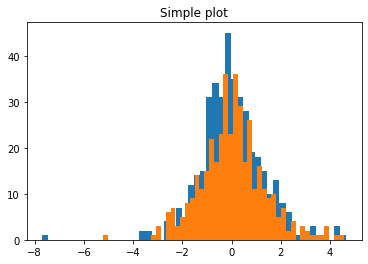

In [12]:

fig, ax = plt.subplots()
ax.hist(x_prozent, label='DAX', bins=50)
ax.set_title('Simple plot')
ax.hist(y_prozent, label='SPY', bins=50)

In [ ]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.
ax.plot([1, 2, 3, 4], [2, 5, 3, 4])

In [ ]:
def mandelbrot(h, w, maxit=20, r=2):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    x = np.linspace(-2.5, 1.5, 4*h+1)
    y = np.linspace(-1.5, 1.5, 3*w+1)
    A, B = np.meshgrid(x, y)
    C = A + B*1j
    z = np.zeros_like(C)
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + C
        diverge = abs(z) > r                    # who is diverging
        div_now = diverge & (divtime == maxit)  # who is diverging now
        divtime[div_now] = i                    # note when
        z[diverge] = r                          # avoid diverging too much

    return divtime
plt.clf()
plt.imshow(mandelbrot(400, 400))